In [1]:
#### Linear Regression Forecasting

In [49]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
# Currency pair exchange rates for CAD/JPY
cad_jpy_df = pd.read_csv(
    Path("C:/Users/panka/Documents/Homework/Module_10_Challenge/cad_jpy.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [51]:
# Trim the dataset to begin on January 1st, 1990
cad_jpy_df = cad_jpy_df.loc["1990-01-01":, :]
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


In [52]:
#  Data Preparation

# Calculating Returns

# Create a series using "Price" percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
cad_jpy_df['Return'] = (cad_jpy_df[["Price"]].pct_change() * 100)
returns = cad_jpy_df.replace(-np.inf, np.nan).dropna()
returns.head()

,Price,Open,High,Low,Return
Date,,,,,
1990-01-03,125.30,125.24,125.30,125.24,-0.846720
1990-01-04,123.46,123.41,123.46,123.41,-1.468476
1990-01-05,124.54,124.48,124.54,124.48,0.874777
1990-01-08,124.27,124.21,124.27,124.21,-0.216798
1990-01-09,125.10,125.04,125.10,125.04,0.667901


In [53]:
# Create a lagged return using the shift function
cad_jpy_df['Lagged_Return'] = returns['Return'].shift()
# Drop NaN values
cad_jpy_df = cad_jpy_df.dropna()
cad_jpy_df.head()

,Price,Open,High,Low,Return,Lagged_Return
Date,,,,,,
1990-01-04,123.46,123.41,123.46,123.41,-1.468476,-0.846720
1990-01-05,124.54,124.48,124.54,124.48,0.874777,-1.468476
1990-01-08,124.27,124.21,124.27,124.21,-0.216798,0.874777
1990-01-09,125.10,125.04,125.10,125.04,0.667901,-0.216798
1990-01-10,125.81,125.75,125.81,125.75,0.567546,0.667901


In [54]:
 # Create a train/test split for the data using 2018-2019 for testing and the rest for training
tr = cad_jpy_df[:'2017']
te = cad_jpy_df['2018':]

In [55]:
 # Create four dataframes:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
X_train = tr["Lagged_Return"].to_frame()
X_test = te["Lagged_Return"].to_frame()
y_train = tr["Return"]
y_test = te["Return"]

In [56]:
# Preview the X_train data
X_train.head()

,Lagged_Return
Date,
1990-01-04,-0.846720
1990-01-05,-1.468476
1990-01-08,0.874777
1990-01-09,-0.216798
1990-01-10,0.667901


In [57]:
# Create a Linear Regression model and fit it to the training data
from sklearn.linear_model import LinearRegression

# Fit a SKLearn linear regression using  just the training set (X_train, Y_train):
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [58]:
# Make a prediction of "y" values using just the test dataset
predictions = lr_model.predict(X_test)
predictions[:10]

array([ 0.00543439, -0.00731684,  0.00034045, -0.00135793, -0.01636553,
       -0.02443671,  0.00115652,  0.01734924,  0.0433532 , -0.00279188])

In [59]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
lr_df = y_test.to_frame()
lr_df["Predicted Return"] = predictions

In [60]:
lr_df.head()

,Return,Predicted Return
Date,,
2018-01-01,0.245591,0.005434
2018-01-02,-0.055679,-0.007317
2018-01-03,0.011142,0.000340
2018-01-04,0.601604,-0.001358
2018-01-05,0.919158,-0.016366


Text(0.5, 1.0, 'Predicted Returns')

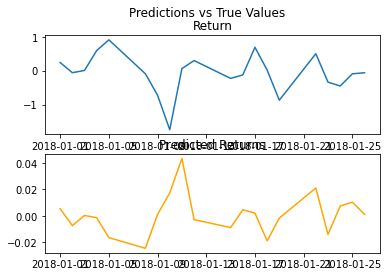

In [61]:
 # Plot the first 20 predictions vs the true values
x = lr_df["Return"][:20]
y = lr_df["Predicted Return"][:20]

plt.figure()
plt.suptitle("Predictions vs True Values")
plt.subplot(2,1,1)
plt.plot(x)
plt.title("Return")
plt.subplot(2, 1, 2)
plt.plot(y, color="orange")
plt.title("Predicted Returns")

In [64]:
# out of sample perfomance

from sklearn.metrics import mean_squared_error
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
out_of_sample_mse = mean_squared_error(lr_df["Return"],lr_df["Predicted Return"])

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
out_of_sample_rmse = np.sqrt(out_of_sample_mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 0.6445805658569028


In [65]:
# In sample perfomance

# Construct a dataframe using just the "y" training data:
lr_df_in_sample = y_train.to_frame()


# Add a column of "in-sample" predictions to that dataframe:  
lr_df_in_sample ["in-sample"] = lr_model.predict(X_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(lr_df_in_sample["Return"],lr_df_in_sample["in-sample"])

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse = np.sqrt(in_sample_mse)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")

In-sample Root Mean Squared Error (RMSE): 0.841994632894117


In [ ]:
# Conclusions

# Does this model perform better or worse on out-of-sample data as compared to in-sample data?

# The out of sample data has lower RMSE than the in sample data, hence it indicates out-of-sample data is more concentrated around the line of best fit.
# So out of sample data Performed better than in sample data.